In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

In [16]:
%matplotlib inline

from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

spath = Path("../../../draft/figures/code/")

In [17]:

sns_iris = sns.load_dataset("iris")

In [18]:
table = iris.Iris(sns_iris)

In [19]:
table.view().get('x')

In [20]:
cmap = {'setosa':'C0', 'versicolor':'C1', 'virginica':'C2'}
transforms = {'x': ('sepal_length', position.Identity()),       
              'y': ('sepal_width', position.Identity()),
              'facecolors':('species', color.Categorical(cmap)), 
              's': (None, lambda _ : itertools.repeat(.05))}


[(4.3, 7.9),
 (2.0, 4.4),
 Text(0.5, 0, 'sepal_length'),
 Text(0, 0.5, 'sepal_width'),
 None]

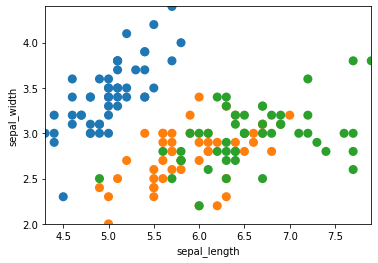

In [21]:
fig, ax = plt.subplots()

artist = point.Point(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.view()[transforms['x'][0]].min(), 
               table.view()[transforms['x'][0]].max()), 
       ylim = (table.view()[transforms['y'][0]].min(), 
               table.view()[transforms['y'][0]].max()),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [71]:
freq = sns_iris.groupby('species')['sepal_length'].mean()

In [23]:
tfreq = iris.FrequencyBar(freq.index, freq.values)

In [24]:
tfreq.view()

{'category': Index(['virginica', 'setosa', 'versicolor'], dtype='object'),
 'count': array([50, 50, 50], dtype=int64)}

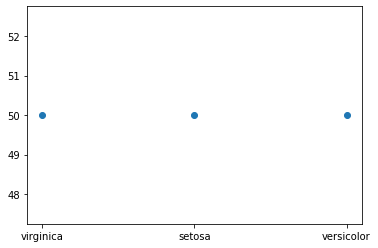

In [25]:
plt.scatter(freq.index, freq.values)

In [36]:
locs = {k:i for i,k in enumerate(tfreq.FB.F['category'].categories)}
fts = {'x':('category', position.Nominal(locs)),  
            'y':('count', position.Identity()), 
       's': (None, lambda _ : itertools.repeat(.5)), 
       'facecolors': (None, lambda _ :'C0')}

[(-1.0, 4.0), (45.0, 55.0), None]

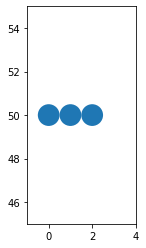

In [37]:
fig, ax = plt.subplots()

artist = point.Point(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-1,4), ylim=(45,55), aspect='equal')


In [38]:
fts = {'position':('category', position.Nominal(locs)),  
        'length':('count', position.Identity())}

<ipython-input-47-49f208a3dcaf>:5: UserWarning: Attempting to set identical bottom == top == 50 results in singular transformations; automatically expanding.
  ax.set(xlim = (-0.5, 3.5),


[(-0.5, 3.5), (47.5, 52.5), Text(0.5, 0, 'category'), Text(0, 0.5, 'count')]

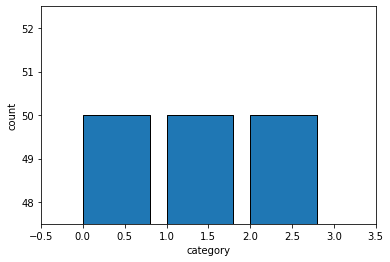

In [47]:
fig, ax = plt.subplots()

artist = bar.Bar(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

<ipython-input-48-6181f4ac5d7a>:5: UserWarning: Attempting to set identical left == right == 50 results in singular transformations; automatically expanding.
  ax.set(ylim = (-0.5, 3.5),


[(-0.5, 3.5),
 (47.5, 52.5),
 Text(0.5, 0, 'category'),
 Text(0, 0.5, 'count'),
 None]

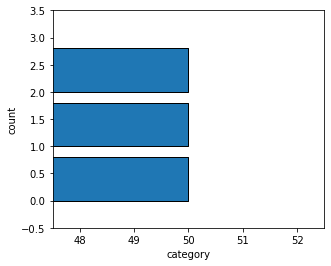

In [48]:
fig, ax = plt.subplots()

artist = bar.Bar(tfreq, fts, orientation='horizontal')
ax.add_artist(artist)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       aspect='equal')

# grouped bar

In [73]:
df = sns_iris.groupby('species').mean().reset_index()
df 

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [74]:
df['sepal_length_color'] = ['lightcoral', 'indianred', 'firebrick']
df['sepal_width_color'] = ['yellowgreen', 'olivedrab', 'darkolivegreen']
df['petal_length_color'] = ['lightskyblue', 'deepskyblue', 'steelblue']
df['petal_width_color'] = ['plum', 'deeppink', 'darkmagenta']


In [75]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_color,sepal_width_color,petal_length_color,petal_width_color
0,setosa,5.006,3.428,1.462,0.246,lightcoral,yellowgreen,lightskyblue,plum
1,versicolor,5.936,2.770,4.260,1.326,indianred,olivedrab,deepskyblue,deeppink
2,virginica,6.588,2.974,5.552,2.026,firebrick,darkolivegreen,steelblue,darkmagenta


In [76]:
bt = iris.Iris(df)

In [77]:
bt.view()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_color,sepal_width_color,petal_length_color,petal_width_color
0,setosa,5.006,3.428,1.462,0.246,lightcoral,yellowgreen,lightskyblue,plum
1,versicolor,5.936,2.770,4.260,1.326,indianred,olivedrab,deepskyblue,deeppink
2,virginica,6.588,2.974,5.552,2.026,firebrick,darkolivegreen,steelblue,darkmagenta


<AxesSubplot:>

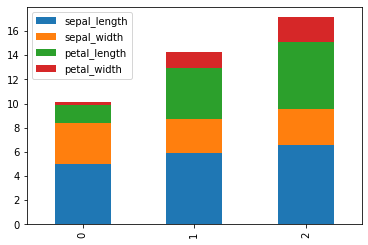

In [78]:
bt.view().plot.bar(stacked=True)

In [82]:
# {channel: column, transformer: {name, multivariate}}
gts = {'position': ('species', position.Nominal(locs)),  
        'length':(['sepal_length', 'sepal_width', 
                   'petal_length', 'petal_width'],             
                    position.Identity()),
        'facecolors': (['sepal_length_color', 'sepal_width_color', 
                   'petal_length_color', 'petal_width_color'],
                   color.Identity())}
        

In [83]:
gts.items()

dict_items([('position', ('species', <matplottoy.encoders.position.Nominal object at 0x0000026775222A90>)), ('length', (['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], <matplottoy.encoders.position.Identity object at 0x00000267752221F0>)), ('facecolors', (['sepal_length_color', 'sepal_width_color', 'petal_length_color', 'petal_width_color'], <matplottoy.encoders.color.Identity object at 0x0000026775222C70>))])

In [86]:
bt.view()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_color,sepal_width_color,petal_length_color,petal_width_color
0,setosa,5.006,3.428,1.462,0.246,lightcoral,yellowgreen,lightskyblue,plum
1,versicolor,5.936,2.770,4.260,1.326,indianred,olivedrab,deepskyblue,deeppink
2,virginica,6.588,2.974,5.552,2.026,firebrick,darkolivegreen,steelblue,darkmagenta


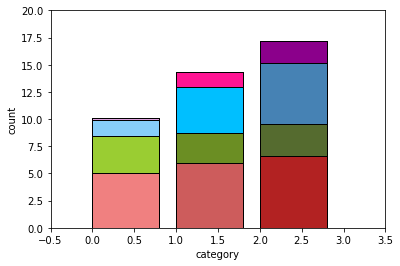

In [84]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 20), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )


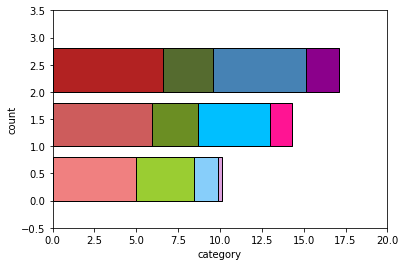

In [67]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 20), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

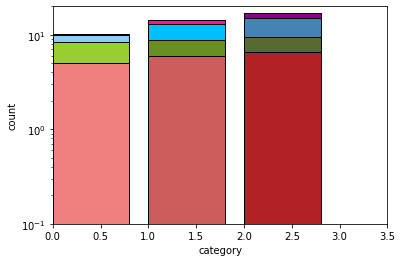

In [68]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 3.5), 
       ylim = (0.1, 20),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       yscale = 'log')

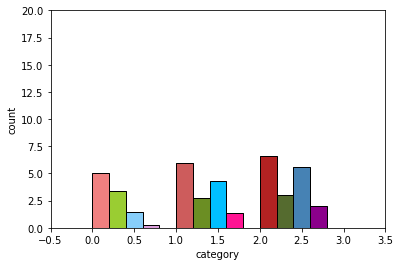

In [69]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=False)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 20), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

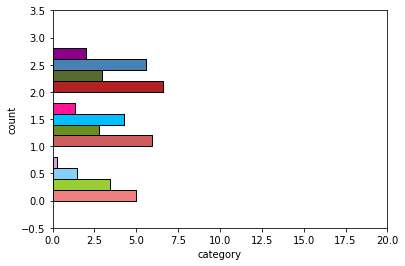

In [70]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=False)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 20), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )